In [1]:
#In order to optimize our inventory, we would like to know which films will be rented next month and we are asked to create a model to predict it.

#Instructions

#Create a query or queries to extract the information you think may be relevant for building the prediction model. It should include some film features and some rental features. Use the data from 2005.
#Create a query to get the list of films and a boolean indicating if it was rented last month (August 2005). This would be our target variable. (this column = y)
#Read the data into a Pandas dataframe.
#Analyze extracted features and transform them. You may need to encode some categorical variables, or scale numerical variables.
#Create a logistic regression model to predict this variable from the cleaned data.
#Evaluate the results.


In [1]:
# prep: import modules and get pwd
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import getpass  # To get the password without showing the input
password = getpass.getpass()

 ··············


In [2]:
# get the data and ---PURIFY IT---TOTAL COMMITMENT!

connection_string = 'mysql+pymysql://root:' + password + '@localhost/sakila'
engine = create_engine(connection_string)
precious_bodily_fluids = '''SELECT f.title, count(distinct case when month(rental_date) = 8 then 1 else null end) as rented_in_august, count(distinct case when month(rental_date) = 7 then 1 else null end) as rented_in_july,count(distinct case when month(rental_date) = 6 then 1 else null end) as rented_in_june 
FROM film f
left join inventory i
on f.film_id = i.film_id
left join rental r 
on i.inventory_id = r.inventory_id
group by f.title'''

data = pd.read_sql_query(precious_bodily_fluids, engine)
data.head(60)


#PLZ IGNORE MY JUNK PILE OF MISERY BELOW 
#left this for future addition of categoricals (TESTING)
# my_cool_query = '''SELECT *, date_format(rental_date, '%%M') AS 'month'
# FROM sakila.rental r
# JOIN sakila.inventory i
# ON r.inventory_id = i.inventory_id
# JOIN sakila.film f
# ON i.film_id = f.film_id;'''

# my_cool_query = '''select *
# from film f
# join inventory i
# on f.film_id = i.film_id
# join rental r
# on i.inventory_id = r.inventory_id;'''

# my_cool_query = '''SELECT f.film_id, title, i.inventory_id, i.store_id, r.staff_id, description, release_year, language_id, original_language_id, rental_duration, rental_rate, length, replacement_cost, rating, special_features, r.last_update, rental_id, rental_date, customer_id, 
# CASE
# WHEN month(rental_date) LIKE '%%2005-08%%' THEN 'True' ELSE 'False' END AS rented_last_month
# FROM film f
# join inventory i
# on f.film_id = i.film_id
# join rental r 
# on i.inventory_id = r.inventory_id;'''

# my_cool_query = '''SELECT BEST.*(SELECT f.title, count(distinct case when month(rental_date) = 8 then 1 else null end) as rented_in_august, count(distinct case when month(rental_date) = 7 then 1 else null end) as rented_in_july,count(distinct case when month(rental_date) = 6 then 1 else null end) as rented_in_june 
# FROM film f
# left join inventory i
# on f.film_id = i.film_id
# left join rental r 
# on i.inventory_id = r.inventory_id
# group by f.title) BEST 
# left join film_actor a2
# ON a1.actor_id = a2.actor_id AND a1.film_id <> a2.film_id
# group by a1.film_id
# ORDER BY a1.film_id asc;'''


,title,rented_in_august,rented_in_july,rented_in_june
0,ACADEMY DINOSAUR,1,1,1
1,ACE GOLDFINGER,1,1,0
2,ADAPTATION HOLES,1,1,1
3,AFFAIR PREJUDICE,1,1,1
4,AFRICAN EGG,1,1,1
5,AGENT TRUMAN,1,1,1
6,AIRPLANE SIERRA,1,1,1
7,AIRPORT POLLOCK,1,1,1
8,ALABAMA DEVIL,1,1,0
9,ALADDIN CALENDAR,1,1,1


In [3]:
data.shape

(1000, 4)

In [4]:
#plz ignore this
#data['release_year'].value_counts(dropna=False)

In [5]:
data.dtypes

title               object
rented_in_august     int64
rented_in_july       int64
rented_in_june       int64
dtype: object

In [6]:
testing = '''select * from film;'''
data_testing = pd.read_sql_query(testing, engine)
data_testing.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"Deleted Scenes,Behind the Scenes",2006-02-15 05:03:42
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"Trailers,Deleted Scenes",2006-02-15 05:03:42
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"Trailers,Deleted Scenes",2006-02-15 05:03:42
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"Commentaries,Behind the Scenes",2006-02-15 05:03:42
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,Deleted Scenes,2006-02-15 05:03:42


In [7]:
data.isna().sum()

title               0
rented_in_august    0
rented_in_july      0
rented_in_june      0
dtype: int64

In [8]:
#kind of useless since I dropped the entire column (see below) #update, don't need at all
#data = data[data['original_language_id'].isna() == False]   #select only the nan values and drop

In [9]:
#plz ignore
#data = data.drop(['original_language_id'], axis = 1)

In [51]:
data.isna().sum() 

title               0
rented_in_august    0
rented_in_july      0
rented_in_june      0
dtype: int64

In [36]:
# this code works, but will try another time when I actually have free time
#data['rented_in_august'] = data['rental_date'].dt.date(year,month)
# data.head()
# data = data[data['rented_in_august']=='August']
# data.head()
# file = file[(file['months'] == 'January') | (file['months'] == 'February') | (file['months'] == 'March')]
# display(file.head())
# display(file.shape)

#also does not work for my purposes, only outputs month-year
# data['rented_in_aug'] = data['rental_date'].apply(lambda x: x.strftime('%B-%Y')) 
# display(data.head())

In [52]:
import matplotlib.pyplot as plt

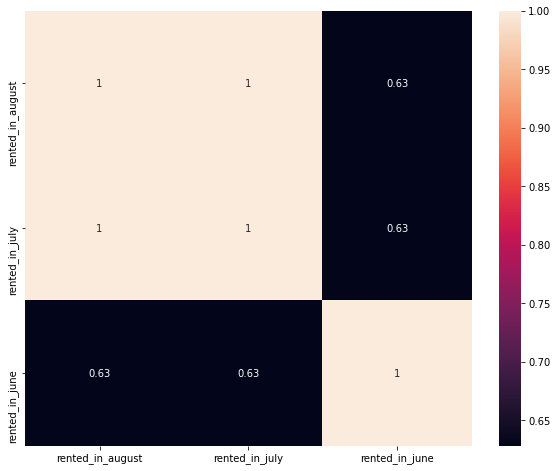

In [10]:
corr_matrix=data.corr(method='pearson')  # amazing heatmap here
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [11]:
data.describe()

,rented_in_august,rented_in_july,rented_in_june
count,1000.00000,1000.00000,1000.00000
mean,0.95800,0.95800,0.90000
std,0.20069,0.20069,0.30015
min,0.00000,0.00000,0.00000
25%,1.00000,1.00000,1.00000
50%,1.00000,1.00000,1.00000
75%,1.00000,1.00000,1.00000
max,1.00000,1.00000,1.00000


In [12]:
data.isna().sum()  #check nan, of course it is 0, aka PURITY

title               0
rented_in_august    0
rented_in_july      0
rented_in_june      0
dtype: int64

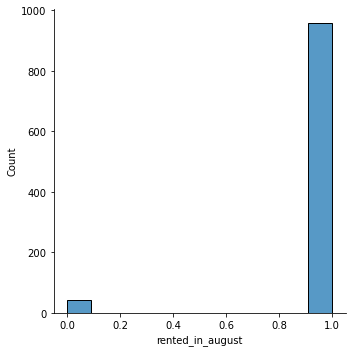

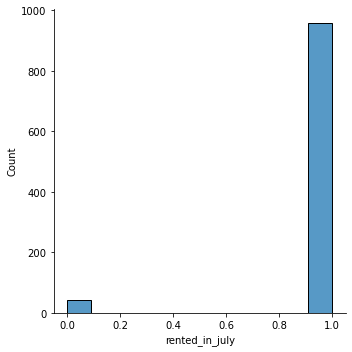

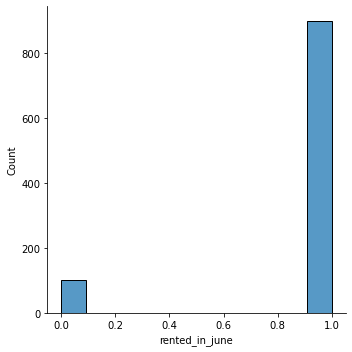

In [13]:
# pretty graphs showing neatly distributed data thanks to the preserving_bodily_fluids query
sns.displot(data['rented_in_august'])
plt.show()

sns.displot(data['rented_in_july'])
plt.show()

sns.displot(data['rented_in_june'])
plt.show()

In [60]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# not much use with the pure data, but included it anyway

X_num = data.select_dtypes(include = np.number)
X_cat = data.select_dtypes(include = np.object)

# Scaling data
transformer = MinMaxScaler().fit(X_num)
x_normalized = transformer.transform(X_num)
x_norm = pd.DataFrame(x_normalized)
x_norm.head()

<ipython-input-60-7491b46249f3>:6: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_cat = data.select_dtypes(include = np.object)


,0,1,2
0,1.0,1.0,1.0
1,1.0,1.0,0.0
2,1.0,1.0,1.0
3,1.0,1.0,1.0
4,1.0,1.0,1.0


In [62]:
# Need to train-test-split BEFORE I apply transformations
# THEN train transformation on training set only
y = data['rented_in_august']
X = data.drop('rented_in_august', axis=1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1337)

In [63]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
#not sure why I put this code here, not really necessary 
X_train_num = X_train.select_dtypes(include = np.number)

# Scaling data
transformer = MinMaxScaler().fit(X_train_num) # need to keep transformer
X_train_normalized = transformer.transform(X_train_num)
X_train_norm = pd.DataFrame(X_train_normalized)

In [64]:
X_train_norm.columns = X_train_num.columns   #amazing data PURITY
X_train_norm.head()

,rented_in_july,rented_in_june
0,1.0,1.0
1,1.0,1.0
2,1.0,1.0
3,1.0,1.0
4,1.0,1.0


In [ ]:
# CAUTION don't use this
# X_train_categorical = X_train.select_dtypes(include = np.object)
# X_train_cat = pd.get_dummies(X_train_categorical, 
#                              columns=['type', 'operation', 'k_symbol', 'duration'],
#                              drop_first=True)
# X_train_cat.head()

In [71]:
# CHANGE code when adding categorical data
# build X_train and y_train
# remember: y = data['status'], y_train selected in train_test_split  #change this when adding more categorical values

# X_train_transformed = np.concatenate([X_train_norm, X_train_cat], axis=1)
X_train_transformed = X_train_norm

In [72]:
#tried both
from sklearn.linear_model import LogisticRegression
classification = LogisticRegression(random_state=0, solver='lbfgs',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [73]:
classification = LogisticRegression(random_state=0, solver='saga',
                  multi_class='multinomial').fit(X_train_transformed, y_train)

In [74]:
# for numericals
X_test_num = X_test.select_dtypes(include = np.number)

# SCALING
# use the transformer that was trained on the PURE data
X_test_normalized = transformer.transform(X_test_num)
X_test_norm = pd.DataFrame(X_test_normalized)

In [ ]:
# # for categoricals ONLY
# X_test_categorical = X_test.select_dtypes(include = np.object)
# X_test_cat = pd.get_dummies(X_test_categorical, 
#                             columns=['type', 'operation', 'k_symbol', 'duration'],
#                             drop_first=True)
# # verify that dummies columns are in the same order and that the same column was dropped
# display(list(zip(list(X_train_cat.columns),list(X_test_cat.columns))))
# # not needed if you treat each original column seperately with one_hot_encoder

# X_test_cat.head()

In [76]:
#change this code when adding categoricals
#X_test_transformed = np.concatenate([X_test_norm, X_test_cat], axis=1)
X_test_transformed = X_test_norm

In [77]:
#PREDICTIONS!!! AMAZING AND PURE DATA
predictions = classification.predict(X_test_transformed)
classification.score(X_test_transformed, y_test)

1.0

In [78]:
#it literally can't get better than this
print(y_test.value_counts())

1    190
0     10
Name: rented_in_august, dtype: int64


In [79]:
pd.Series(predictions).value_counts()
# This shows that the disparity in the numbers are MINIMAL 

1    190
0     10
dtype: int64

In [80]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)
#more results to confirm the PURE data

array([[ 10,   0],
       [  0, 190]], dtype=int64)

In [86]:
from sklearn.metrics import mean_absolute_error, r2_score
mae = mean_absolute_error(y_test, predictions)
print(mae)
r2 = r2_score(y_test, predictions)
r2
#amazing r2 score

0.0


1.0

In [87]:
# bonus:::: KNN classifier::::: JUST FOR FUN ON A LATE NIGHT :::::::::::::::
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(n_neighbors=3, weights='uniform')
clf.fit(X_train_transformed, y_train)
predictions_clf = clf.predict(X_test_transformed)
clf.score(X_test_transformed, y_test)
#again confirming amazing results: tried with n_neighbors = 1,2,3,4,5,6,7,8,9,10 and I put 3 because I like the number 3

1.0

In [88]:
confusion_matrix(y_test, predictions_clf)
#literally the same as above, not even sure if KKN is even doing anything at this point

array([[ 10,   0],
       [  0, 190]], dtype=int64)

In [89]:
pd.Series(y_test).value_counts()

1    190
0     10
Name: rented_in_august, dtype: int64

In [90]:
pd.Series(predictions_clf).value_counts()
#test confirms initial beliefs on the PURITY OF DATA

1    190
0     10
dtype: int64